In [13]:
import pandas as pd

#affichage des premieres lignes
df = pd.read_csv('CO2 Emissions_Canada.csv')
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [22]:
#taille du fichier
print(f"Nombre de lignes : {df.shape[0]}")  # Nombre de lignes
print(f"Nombre de colonnes : {df.shape[1]}")  # Nombre de colonnes

Nombre de lignes : 7385
Nombre de colonnes : 12


In [23]:
# extraire le type des données 
print(df.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


In [21]:
#Résumé statistique (colonnes numériques) :
print(df.describe())  # Moyenne, min, max, etc.

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000         

In [ ]:
# affiche le nombre de valeurs manquantes (null ou NaN) pour chaque colonne du DataFrame
print(df.isnull().sum())

#affichage du pourcentage des valeurs manquantes pour chaque colonne 
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

In [3]:
doublons = df.duplicated()
print(f"Nombre de doublons : {doublons.sum()}")

Nombre de doublons : 1103


In [14]:
# Supprimer les doublons (en gardant la première occurrence)
df_unique = df.drop_duplicates()

# Sauvegarder le DataFrame sans doublons dans un nouveau fichier CSV
df_unique.to_csv('fichier_sans_doublons.csv', index=False)
print("Le fichier sans doublons a été créé avec succès !")

print(df_unique)

Le fichier sans doublons a été créé avec succès !
       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z     

In [15]:
doublons = df_unique.duplicated()
print(f"Nombre de doublons : {doublons.sum()}")

Nombre de doublons : 0


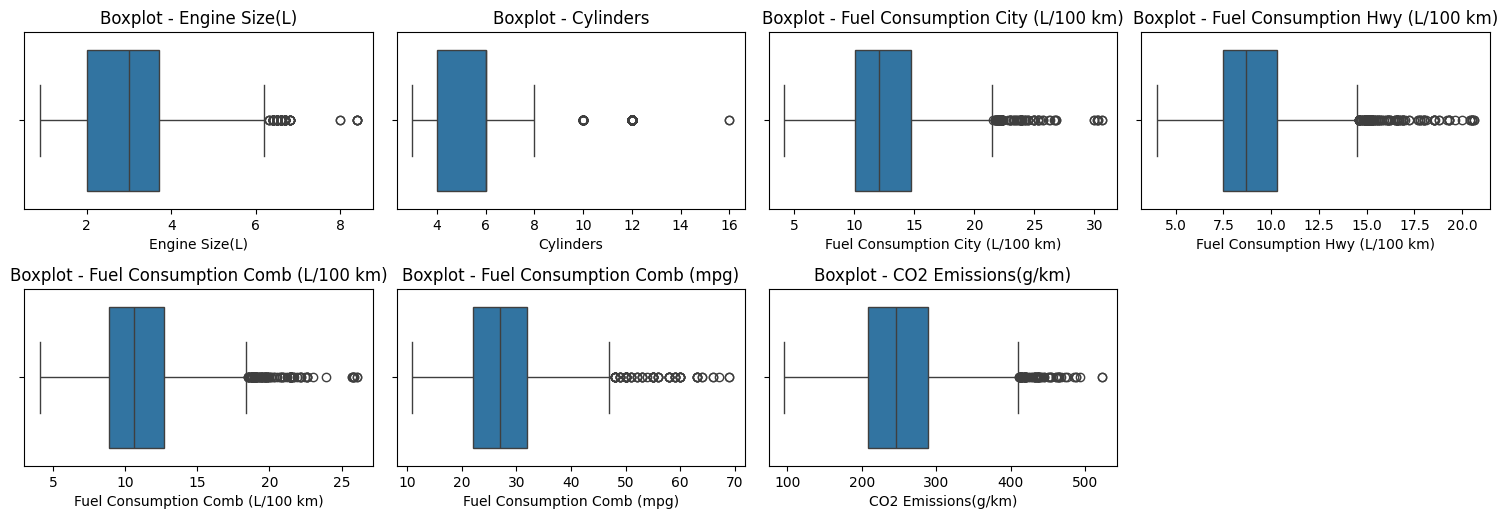

In [16]:

import seaborn as sns
import matplotlib.pyplot as plt
# Colonnes numériques à analyser
colonnes_numeriques = [
    'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
    'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'
]

# Visualiser les Graphiques Avant Détection
plt.figure(figsize=(15, 10))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_unique, x=col)
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()



In [18]:
# Fonction pour détecter les valeurs aberrantes
def detecter_valeurs_aberrantes(df, colonnes):
    valeurs_aberrantes = {}
    
    for col in colonnes:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Définir les bornes
        borne_inferieure = Q1 - 1.5 * IQR
        borne_superieure = Q3 + 1.5 * IQR
        
        # Détecter les lignes aberrantes
        valeurs_aberrantes[col] = df[(df[col] < borne_inferieure) | (df[col] > borne_superieure)]
        
        # Afficher les statistiques
        print(f"Colonne: {col}")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Borne inférieure: {borne_inferieure}, Borne supérieure: {borne_superieure}")
        print(f"Nombre de valeurs aberrantes: {len(valeurs_aberrantes[col])}\n")
        
    return valeurs_aberrantes

# Détection des valeurs aberrantes
valeurs_aberrantes = detecter_valeurs_aberrantes(df_unique, colonnes_numeriques)

Colonne: Engine Size(L)
Q1: 2.0, Q3: 3.7, IQR: 1.7000000000000002
Borne inférieure: -0.5500000000000003, Borne supérieure: 6.25
Nombre de valeurs aberrantes: 121

Colonne: Cylinders
Q1: 4.0, Q3: 6.0, IQR: 2.0
Borne inférieure: 1.0, Borne supérieure: 9.0
Nombre de valeurs aberrantes: 177

Colonne: Fuel Consumption City (L/100 km)
Q1: 10.1, Q3: 14.7, IQR: 4.6
Borne inférieure: 3.2, Borne supérieure: 21.599999999999998
Nombre de valeurs aberrantes: 116

Colonne: Fuel Consumption Hwy (L/100 km)
Q1: 7.5, Q3: 10.3, IQR: 2.8000000000000007
Borne inférieure: 3.299999999999999, Borne supérieure: 14.500000000000002
Nombre de valeurs aberrantes: 150

Colonne: Fuel Consumption Comb (L/100 km)
Q1: 8.9, Q3: 12.7, IQR: 3.799999999999999
Borne inférieure: 3.200000000000002, Borne supérieure: 18.4
Nombre de valeurs aberrantes: 115

Colonne: Fuel Consumption Comb (mpg)
Q1: 22.0, Q3: 32.0, IQR: 10.0
Borne inférieure: 7.0, Borne supérieure: 47.0
Nombre de valeurs aberrantes: 95

Colonne: CO2 Emissions(g/k

In [25]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Appliquer la suppression des valeurs aberrantes à chaque colonne numérique
for column in df_unique.select_dtypes(include=['float64', 'int64']).columns:
    df_unique = remove_outliers(df_unique, column)

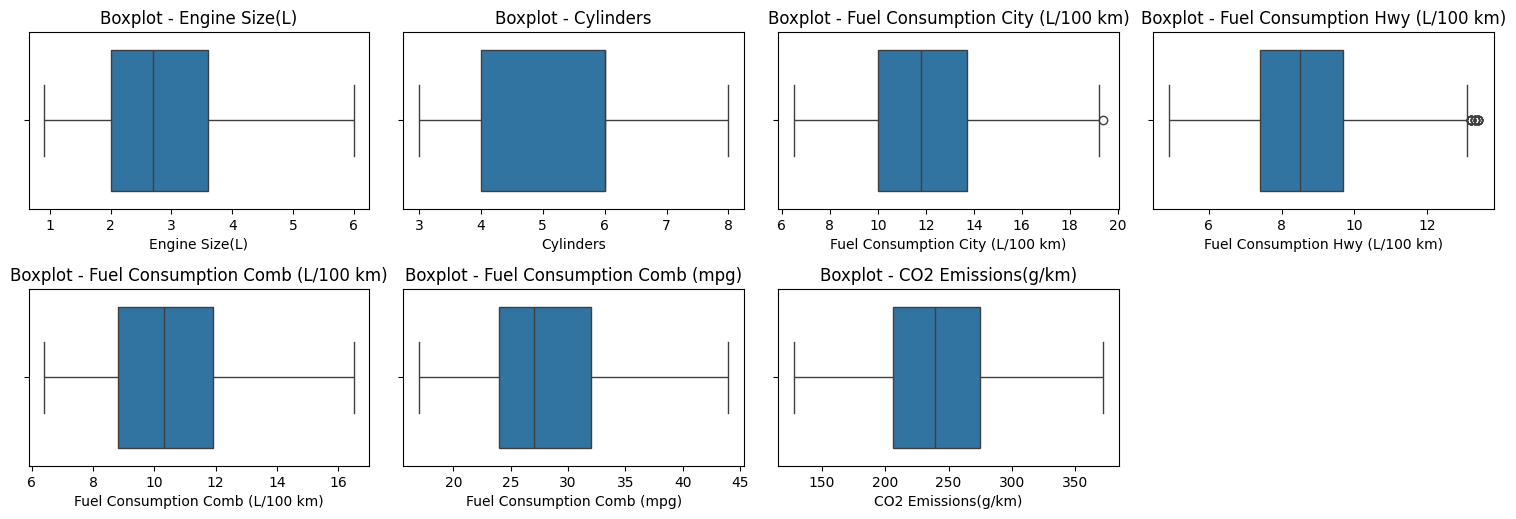

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
  
plt.figure(figsize=(15, 10))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_unique, x=col)
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()

In [ ]:
# la conssistance 
#traitement d'imbalanced 